# Freesound Audio Tagging


First steps into the free sound audio dataset.

In [1]:
import numpy as np
import pandas as pd
import os
import wave
import IPython.display as ipd # plays a file within notebook
import glob
import random 
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn')

In [20]:
train_set = pd.read_csv('data/train.csv')
test_set = pd.read_csv('data/test_post_competition.csv')

In [3]:
files = glob.glob('data/audio_train/*.wav')
print('No of wav training set:', len(files))

No of wav training set: 9473


In [4]:
# listen to a random audio
flv = random.choice(files)
ipd.Audio(flv)

In [5]:
# understanding the wav file form
# use scipy to get frame rate information of the wav file. 

from scipy.io import wavfile
rate, n_samples = wavfile.read(flv)
print("Sampling (frame) rate = ", rate)
print("Total samples (frames) = ", n_samples.shape)
print(n_samples)

Sampling (frame) rate =  44100
Total samples (frames) =  (358974,)
[202 213 131 ...   0  -1   1]


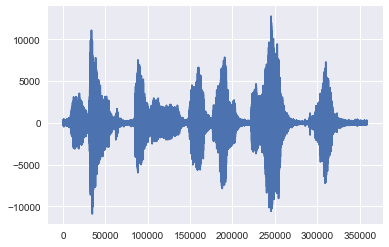

In [6]:
plt.plot(n_samples)
plt.show()

In [7]:
train_set.head()

,fname,label,manually_verified
0,00044347.wav,Hi-hat,0
1,001ca53d.wav,Saxophone,1
2,002d256b.wav,Trumpet,0
3,0033e230.wav,Glockenspiel,1
4,00353774.wav,Cello,1


In [21]:
test_set.head()

,fname,label,usage,freesound_id,license
0,00063640.wav,None,Ignored,88926,Attribution
1,0013a1db.wav,None,Ignored,373335,Creative Commons 0
2,002bb878.wav,None,Ignored,189611,Attribution
3,002d392d.wav,None,Ignored,35939,Attribution
4,00326aa9.wav,Oboe,Private,355125,Attribution


In [8]:
wavfile.read(flv)[1]

array([202, 213, 131, ...,   0,  -1,   1], dtype=int16)

In [9]:
# Get n_samples for the whole train set and append to the train_set df

train_set['n_samples'] = train_set.fname.apply(lambda f: len(wavfile.read('data/audio_train/' + f)[1]))
test_set['n_samples'] = test_set.fname.apply(lambda f: len(wavfile.read('data/audio_test/' + f)[1]))

In [10]:
train_set.head()

,fname,label,manually_verified,n_samples
0,00044347.wav,Hi-hat,0,617400
1,001ca53d.wav,Saxophone,1,455112
2,002d256b.wav,Trumpet,0,19404
3,0033e230.wav,Glockenspiel,1,352800
4,00353774.wav,Cello,1,199332


In [23]:
test_set.head()

,fname,label,usage,freesound_id,license,n_samples
0,00063640.wav,None,Ignored,88926,Attribution,69678
1,0013a1db.wav,None,Ignored,373335,Creative Commons 0,36162
2,002bb878.wav,None,Ignored,189611,Attribution,59094
3,002d392d.wav,None,Ignored,35939,Attribution,22050
4,00326aa9.wav,Oboe,Private,355125,Attribution,91728


In [26]:
test_set = test_set.drop(['usage', 'license'], axis=1)

In [27]:
test_set.head()

,fname,label,freesound_id,n_samples
0,00063640.wav,None,88926,69678
1,0013a1db.wav,None,373335,36162
2,002bb878.wav,None,189611,59094
3,002d392d.wav,None,35939,22050
4,00326aa9.wav,Oboe,355125,91728


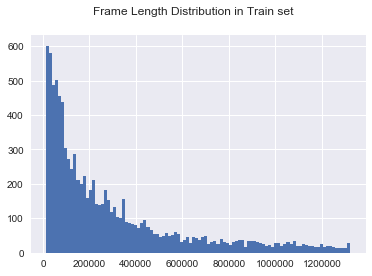

In [11]:
# Analysing the frame length distribution

train_set.n_samples.hist(bins=100)
plt.suptitle('Frame Length Distribution in Train set', ha='center', fontsize='large');

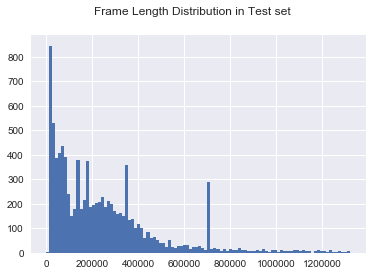

In [28]:
test_set.n_samples.hist(bins=100)
plt.suptitle('Frame Length Distribution in Test set', ha='center', fontsize='large');